<a href="https://colab.research.google.com/github/bzizmza/Cats-Dogs-Sheeps-Images-Classification-Using-Model-Deployment/blob/main/CatsDogsSheepsImagesClassificationUsingModelDeployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cats Dogs Sheeps Images Classification Using Model Deployment
## by Abimanyu Sri Setyo

**Project Criteria**
* The dataset to be used is free, but has at least 1000 images.
* The dataset has never been used in a machine learning class submission before.
* The dataset is divided into 80% train set and 20% test set.
* The model must use a sequential model.
* The model must use Conv2D Maxpooling Layer.
* The accuracy of the training and validation set is at least 80%.
* Using Callbacks.
* Make a plot against the accuracy and loss of the model.
* Write code to save the model into TF-Lite format.

**About Project**<br>
This project aims to classify similar animals using TensorFlow and deployment models.

**About Dataset**<br>
This project uses the **[Animals Images](https://www.kaggle.com/datasets/madisona/translated-animals10)** dataset from Kaggle.**teks tebal**

## Import Libraries

In [1]:
import zipfile
import os
import glob 
import warnings

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

from keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Import Dataset

In [2]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download madisona/translated-animals10

100% 585M/586M [00:25<00:00, 50.5MB/s]
100% 586M/586M [00:25<00:00, 23.9MB/s]


In [5]:
local_zip = '/content/translated-animals10.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
! rm -r /content/animals10/raw-img/butterfly
! rm -r /content/animals10/raw-img/chicken
! rm -r /content/animals10/raw-img/cow
! rm -r /content/animals10/raw-img/elephant
! rm -r /content/animals10/raw-img/horse
! rm -r /content/animals10/raw-img/spider
! rm -r /content/animals10/raw-img/squirrel

In [7]:
dir_dataset = "/content/animals10/raw-img/"
dir_dogs = os.path.join("/content/animals10/raw-img/dog")
dir_cats = os.path.join("/content/animals10/raw-img/cat")
dir_sheeps = os.path.join("/content/animals10/raw-img/sheep")

In [8]:
total_image = len(list(glob.iglob("/content/animals10/raw-img/*/*.*", recursive=True)))
print("Total Data Image JPEG     : ",total_image)

total_dogs = len(os.listdir(dir_dogs))
total_cats = len(os.listdir(dir_cats))
total_sheeps = len(os.listdir(dir_sheeps))

print("Total Data Dogs Image      : ",total_dogs)
print("Total Data Cats Image       : ",total_cats)
print("Total Data Cats Image       : ",total_sheeps)

Total Data Image JPEG     :  8351
Total Data Dogs Image      :  4863
Total Data Cats Image       :  1668
Total Data Cats Image       :  1820


## Image Processing
Implementation of Tensorflow Image Data Generator for image processing

In [9]:
val_size = 0.2

Train_datagen = ImageDataGenerator(
    rotation_range = 30,
    brightness_range = [0.2,1.0],
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
    rescale = 1./255,
    validation_split = val_size
)

Validation_datagen = ImageDataGenerator(
    rotation_range = 30,
    brightness_range = [0.2,1.0],
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
    rescale = 1./255,
    validation_split = val_size
)

## Split Dataset
Split Dataset -> Train and Validation | Size Validation 20%

In [10]:
img_width = 150
img_height = 150

In [11]:
Train_generator = Train_datagen.flow_from_directory(
    dir_dataset,
    target_size = (img_width,img_height),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 16,
    shuffle = True,
    subset = "training"
)

Validation_generator = Validation_datagen.flow_from_directory(
    dir_dataset,
    target_size = (img_width,img_height),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 16,
    shuffle = False,
    subset = "validation"
)

Found 6682 images belonging to 3 classes.
Found 1669 images belonging to 3 classes.


## Model Sequential + Conv2D + Dropout Regularization

In [12]:
Model = Sequential(
    [
     Conv2D(32, (3,3), strides = (1,1), activation = 'relu' , input_shape = (img_width,img_height,3)),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Conv2D(64, (3,3), strides = (1,1), activation = 'relu' ),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Conv2D(128, (3,3), strides = (1,1), activation = 'relu' ),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Flatten(),

     Dropout(0.2),
     
     Dense(128, activation = 'relu'),
     Dense(3, activation='softmax')
    ]
)

## Compile Models using Optimizer

In [13]:
Adam(learning_rate=0.00146, name='Adam')
Model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

## Use of Learning Rate Schedule dan Callbacks

In [14]:
def scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
tb_callback = tf.keras.callbacks.TensorBoard(
    log_dir='logs', histogram_freq=0, write_graph=True, write_images=False,
    update_freq='epoch', embeddings_freq=0,
    embeddings_metadata=None
)

Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## Dataset Fit Training Process

In [15]:
batch_size = 16

In [16]:
with tf.device("/device:GPU:0"):
  history = Model.fit(Train_generator, 
                    epochs =  15, 
                    steps_per_epoch = 6682//batch_size, 
                    validation_data = Validation_generator, 
                    verbose = 1, 
                    validation_steps = 1669//batch_size,
                    callbacks =[lr_schedule, tb_callback])


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/15
417/417 [==============================] - 96s 203ms/step - loss: 0.8937 - accuracy: 0.6035 - val_loss: 0.7410 - val_accuracy: 0.6472 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/15
417/417 [==============================] - 75s 180ms/step - loss: 0.7755 - accuracy: 0.6593 - val_loss: 0.7511 - val_accuracy: 0.6550 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/15
417/417 [==============================] - 82s 198ms/step - loss: 0.7233 - accuracy: 0.6959 - val_loss: 0.6550 - val_accuracy: 0.7031 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/15
417/417 [==============================] - 83s 200ms/step - loss: 0.6763 - accuracy: 0.7150 - val_loss: 0.6812 - val_accuracy: 0.6977 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning

## Visualizing Accuracy and Loss

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [19]:
epochs = range(len(acc))

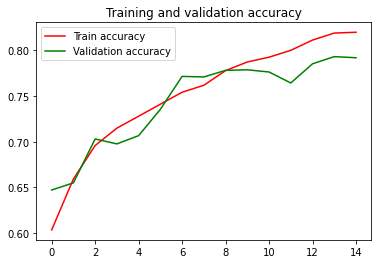

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(epochs, acc, 'r', label='Train accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

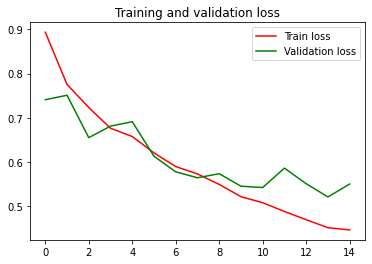

<Figure size 432x288 with 0 Axes>

In [21]:
plt.plot(epochs, loss, 'r', label='Train loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

## Test Models using an Image

Saving test-image.jpeg to test-image.jpeg


Prediction Results :  [1. 0. 0.] 

Image Category : Cats


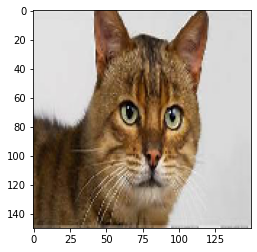

In [22]:
uploaded = files.upload()

for file_upload in uploaded.keys():

  path = file_upload
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = Model.predict(images, batch_size=16)
  
  print("\n")
  print('Prediction Results : ',classes[0],'\n')

  if classes[0][0] == 1:
    print('Image Category : Cats')
  elif classes[0][1] == 1:
    print('Image Category : Dogs')
  else:
    print('Image Category : Sheeps')


## Export Tflite

In [23]:
warnings.filterwarnings('ignore')

converter = tf.lite.TFLiteConverter.from_keras_model(Model)
tflite_model = converter.convert()

with open('CatsDogsSheepsImagesClassificationUsingModelDeployment.tflite', 'wb') as f:
  f.write(tflite_model)